<style>
h1 {
    border-bottom: 2px solid;
}
h2 {
    border-bottom: 1px solid;
}
/* hr {
    border-top: 2px solid;
    border-bottom: none;
} */
.student-info {
    text-align: right;
    border-bottom: none;
}
hr.double-div {
    border-top: 2px solid;
    border-bottom: 2px solid;
    border-left: none;
    border-right: none;
    height: 10pt;
    /* border-radius: 1px; */
}
blockquote {
    border-left: 2px solid;
    /* background-color: #00000488; */
    /* filter: brightness(80%); */
    margin-left: 2em;
    margin-right: 2em;
    padding: 1px 2px 1px 1em;
}
pre {
    border: 1px solid #88888888;
    margin-left: 1em;
    margin-right: 1em;
    padding: 0.5em;
    /*padding: 8pt 1em 8pt 1em;*/
}
blockquote > pre {
    margin-left: 0.5em;
}
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>

<h2 class="student-info">
    Andrew Osterhout <br/>
    (u1317172)
</h2>

# Asg-9 template

In [98]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.Def_PDA    import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Problem 6, Page 159, the "OR" case.
## Test your CFG below for 

$ \{ a^i c^k b^j d^l \;:\; (i==j)\; OR\; (k==l)\}$

## Note that for the CFG that is to be simulated using Jove's PDA, the nonterminals must be only a single letter (i.e. if you used a nonterminals "As" for one or more a, and you pushed As on the stack, it will be interpreted as "A" followed by "s").

In [99]:
# Type the CFG in the comments of the PDA
# Then convert to PDA and run the tests below

pda_acbd = md2mc(
'''
PDA

!!---Initially I'll write using multi-letter nonterminals...
!!   Then I'll turn them into single-letter nonterminals.
!!
!! S        ->  i_EQ_j | k_EQ_l | ε
!! i_EQ_j   ->  a i_EQ_j b D | C
!! k_EQ_l   ->  A c k_EQ_l D | B 
!! A        ->  a A | ε
!! B        ->  b B | ε
!! C        ->  c C | ε
!! D        ->  d D | ε


!!---Now turning into single-letter non-terminals
!!---To avoid the dual-use of "S", the second use is "Z"
!!
!! S    ->  J | K | ε
!! J    ->  a J b D | C
!! K    ->  A c K D | B 
!! A    ->  a A | ε
!! B    ->  b B | ε
!! C    ->  c C | ε
!! D    ->  d D | ε


!!=== PDA below ======================================

!!-- Initial State & Setup -------------
IF  : '','' ; S     -> M


!!-- Set up Paths for Grammers ---------
!!- S / "starting" grammar -
M   : '',S  ; J     -> M
M   : '',S  ; K     -> M
M   : '',S  ; ''    -> M

!!- J / i_EQ_j grammar -----
M   : '',J  ; aJbD  -> M
M   : '',J  ; C     -> M

!!- K / k_EQ_l grammar -----
M   : '',K  ; AcKd  -> M
M   : '',K  ; B     -> M

!!- A gramer ---------------
M   : '',A  ; aA    -> M
M   : '',A  ; ''    -> M

!!- B gramer ---------------
M   : '',B  ; bB    -> M
M   : '',B  ; ''    -> M

!!- C gramer ---------------
M   : '',C  ; cC    -> M
M   : '',C  ; ''    -> M

!!- D gramer ---------------
M   : '',D  ; dD    -> M
M   : '',D  ; ''    -> M


!!-- Setup paths for string processing --
M   : a,a   ; ''    -> M
M   : b,b   ; ''    -> M
M   : c,c   ; ''    -> M
M   : d,d   ; ''    -> M


!!-- Final Acceptance Condition ---------
M   : '',#  ; #     -> F

''')

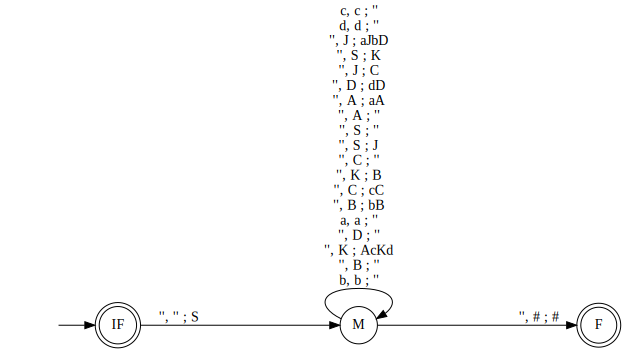

In [100]:
dotObj_pda(pda_acbd, FuseEdges=True)

In [101]:
explore_pda("acbd", pda_acbd)   # ACCEPT

String acbd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'J#')
->  ('M', 'acbd', 'aJbD#')
->  ('M', 'cbd', 'JbD#')
->  ('M', 'cbd', 'CbD#')
->  ('M', 'cbd', 'cCbD#')
->  ('M', 'bd', 'CbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'K#')
->  ('M', 'acbd', 'AcKd#')
->  ('M', 'acbd', 'aAcKd#')
->  ('M', 'cbd', 'AcKd#')
->  ('M', 'cbd', 'cKd#')
->  ('M', 'bd', 'Kd#')
->  ('M', 'bd', 'Bd#')
->  ('M', 'bd', 'bBd#')
->  ('M', 'd', 'Bd#')
->  ('M', 'd', 'd#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [102]:
explore_pda("aacbbd", pda_acbd) # ACCEPT

String aacbbd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aacbbd', '#')
->  ('M', 'aacbbd', 'S#')
->  ('M', 'aacbbd', 'J#')
->  ('M', 'aacbbd', 'aJbD#')
->  ('M', 'acbbd', 'JbD#')
->  ('M', 'acbbd', 'aJbDbD#')
->  ('M', 'cbbd', 'JbDbD#')
->  ('M', 'cbbd', 'CbDbD#')
->  ('M', 'cbbd', 'cCbDbD#')
->  ('M', 'bbd', 'CbDbD#')
->  ('M', 'bbd', 'bDbD#')
->  ('M', 'bd', 'DbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aacbbd', '#')
->  ('M', 'aacbbd', 'S#')
->  ('M', 'aacbbd', 'K#')
->  ('M', 'aacbbd', 'AcKd#')
->  ('M', 'aacbbd', 'aAcKd#')
->  ('M', 'acbbd', 'AcKd#')
->  ('M', 'acbbd', 'aAcKd#')
->  ('M', 'cbbd', 'AcKd#')
->  ('M', 'cbbd', 'cKd#')
->  ('M', 'bbd', 'Kd#')
->  ('M', 'bbd', 'Bd#')
->  ('M', 'bbd', 'bBd#')
->  ('M', 'bd', 'Bd#')
->  ('M', 'bd', 'bBd#')
->  ('M', 'd', 

In [103]:
explore_pda("aaaccbbbddd", pda_acbd)    # ACCEPT

String aaaccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaccbbbddd', '#')
->  ('M', 'aaaccbbbddd', 'S#')
->  ('M', 'aaaccbbbddd', 'J#')
->  ('M', 'aaaccbbbddd', 'aJbD#')
->  ('M', 'aaccbbbddd', 'JbD#')
->  ('M', 'aaccbbbddd', 'aJbDbD#')
->  ('M', 'accbbbddd', 'JbDbD#')
->  ('M', 'accbbbddd', 'aJbDbDbD#')
->  ('M', 'ccbbbddd', 'JbDbDbD#')
->  ('M', 'ccbbbddd', 'CbDbDbD#')
->  ('M', 'ccbbbddd', 'cCbDbDbD#')
->  ('M', 'cbbbddd', 'CbDbDbD#')
->  ('M', 'cbbbddd', 'cCbDbDbD#')
->  ('M', 'bbbddd', 'CbDbDbD#')
->  ('M', 'bbbddd', 'bDbDbD#')
->  ('M', 'bbddd', 'DbDbD#')
->  ('M', 'bbddd', 'bDbD#')
->  ('M', 'bddd', 'DbD#')
->  ('M', 'bddd', 'bD#')
->  ('M', 'ddd', 'D#')
->  ('M', 'ddd', 'dD#')
->  ('M', 'dd', 'D#')
->  ('M', 'dd', 'dD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [104]:
explore_pda("aaaacccbbbddd", pda_acbd)  # ACCEPT

String aaaacccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaacccbbbddd', '#')
->  ('M', 'aaaacccbbbddd', 'S#')
->  ('M', 'aaaacccbbbddd', 'K#')
->  ('M', 'aaaacccbbbddd', 'AcKd#')
->  ('M', 'aaaacccbbbddd', 'aAcKd#')
->  ('M', 'aaacccbbbddd', 'AcKd#')
->  ('M', 'aaacccbbbddd', 'aAcKd#')
->  ('M', 'aacccbbbddd', 'AcKd#')
->  ('M', 'aacccbbbddd', 'aAcKd#')
->  ('M', 'acccbbbddd', 'AcKd#')
->  ('M', 'acccbbbddd', 'aAcKd#')
->  ('M', 'cccbbbddd', 'AcKd#')
->  ('M', 'cccbbbddd', 'cKd#')
->  ('M', 'ccbbbddd', 'Kd#')
->  ('M', 'ccbbbddd', 'AcKdd#')
->  ('M', 'ccbbbddd', 'cKdd#')
->  ('M', 'cbbbddd', 'Kdd#')
->  ('M', 'cbbbddd', 'AcKddd#')
->  ('M', 'cbbbddd', 'cKddd#')
->  ('M', 'bbbddd', 'Kddd#')
->  ('M', 'bbbddd', 'Bddd#')
->  ('M', 'bbbddd', 'bBddd#')
->  ('M', 'bbddd', 'Bddd#')
->  ('M', 'bbddd', 'bBddd#')
->  ('M', 'bddd', 'Bddd#')
->  ('M', 'bddd', 'bBddd#')
->  ('M', 'ddd', 'Bddd#')
->  ('M', 'ddd', 'ddd#'

In [105]:
explore_pda("aaaacccbbbdddd", pda_acbd) # REJECT

String aaaacccbbbdddd rejected by your PDA :-(
Visited states are:
{('M', 'dddd', 'dDbD#'), ('M', 'cccbbbdddd', 'cKd#'), ('M', 'bbbdddd', 'bBddd#'), ('M', 'aacccbbbdddd', 'CbDbD#'), ('M', 'aaaacccbbbdddd', 'AcKd#'), ('M', 'aaacccbbbdddd', 'aJbDbD#'), ('M', 'd', 'DbD#'), ('M', 'bbbdddd', 'cKdddd#'), ('M', 'bdddd', 'dDbDbD#'), ('M', 'bbbdddd', 'cCbDbDbDbD#'), ('M', 'ddd', 'bD#'), ('M', 'aaacccbbbdddd', 'CbD#'), ('M', 'aaaacccbbbdddd', 'aJbD#'), ('M', 'd', '#'), ('M', 'aacccbbbdddd', 'bDbD#'), ('M', 'bbbdddd', 'Bddd#'), ('M', 'ccbbbdddd', 'd#'), ('M', 'aacccbbbdddd', 'aAcKd#'), ('M', 'bbdddd', 'bBddd#'), ('M', 'cbbbdddd', 'cKddd#'), ('M', 'dddd', 'ddd#'), ('M', 'ccbbbdddd', 'bDbDbDbD#'), ('M', 'bbbdddd', 'CbDbDbDbD#'), ('M', 'cccbbbdddd', 'aJbDbDbDbDbD#'), ('M', 'acccbbbdddd', 'JbDbDbD#'), ('M', 'aacccbbbdddd', 'cCbDbD#'), ('M', 'bbdddd', 'bDbDbD#'), ('M', '', 'bD#'), ('M', 'aacccbbbdddd', 'JbDbD#'), ('M', 'd', 'bD#'), ('M', 'bdddd', 'bBddd#'), ('M', 'aacccbbbdddd', 'AcKd#'), ('M', 'aaacc

In [106]:
explore_pda("aaaabbbb", pda_acbd)   # ACCEPT

String aaaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaabbbb', '#')
->  ('M', 'aaaabbbb', 'S#')
->  ('M', 'aaaabbbb', 'J#')
->  ('M', 'aaaabbbb', 'aJbD#')
->  ('M', 'aaabbbb', 'JbD#')
->  ('M', 'aaabbbb', 'aJbDbD#')
->  ('M', 'aabbbb', 'JbDbD#')
->  ('M', 'aabbbb', 'aJbDbDbD#')
->  ('M', 'abbbb', 'JbDbDbD#')
->  ('M', 'abbbb', 'aJbDbDbDbD#')
->  ('M', 'bbbb', 'JbDbDbDbD#')
->  ('M', 'bbbb', 'CbDbDbDbD#')
->  ('M', 'bbbb', 'bDbDbDbD#')
->  ('M', 'bbb', 'DbDbDbD#')
->  ('M', 'bbb', 'bDbDbD#')
->  ('M', 'bb', 'DbDbD#')
->  ('M', 'bb', 'bDbD#')
->  ('M', 'b', 'DbD#')
->  ('M', 'b', 'bD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [107]:
explore_pda("aaaabbb", pda_acbd)    # REJECT

String aaaabbb rejected by your PDA :-(
Visited states are:
{('M', 'abbb', 'aJbDbDbDbD#'), ('M', 'bbb', 'aJbDbDbDbDbD#'), ('IF', 'aaaabbb', '#'), ('M', 'aaabbb', 'CbD#'), ('M', 'aabbb', 'CbDbD#'), ('F', 'aaaabbb', '#'), ('M', '', 'DbD#'), ('M', 'aaaabbb', 'AcKd#'), ('M', 'b', 'dDbDbD#'), ('M', 'bb', 'DbDbDbD#'), ('M', 'abbb', 'bDbDbD#'), ('M', 'bb', 'dDbDbDbD#'), ('M', 'aaabbb', 'JbD#'), ('M', 'aaaabbb', 'B#'), ('M', 'aabbb', 'aAcKd#'), ('M', 'aabbb', 'bDbD#'), ('M', 'aaabbb', 'bD#'), ('M', 'aaabbb', 'aAcKd#'), ('M', 'aabbb', 'cKd#'), ('M', 'aaaabbb', 'aJbD#'), ('M', 'abbb', 'CbDbDbD#'), ('M', 'aaabbb', 'cKd#'), ('M', 'bbb', 'cCbDbDbDbD#'), ('M', 'aaaabbb', 'S#'), ('M', 'abbb', 'cCbDbDbD#'), ('M', 'aabbb', 'cCbDbD#'), ('M', 'aabbb', 'JbDbD#'), ('M', 'bbb', 'bDbDbDbD#'), ('M', '', 'bD#'), ('M', 'abbb', 'aAcKd#'), ('M', 'abbb', 'cKd#'), ('M', 'aabbb', 'AcKd#'), ('M', 'aaabbb', 'cCbD#'), ('M', 'bbb', 'aAcKd#'), ('M', 'aaabbb', 'AcKd#'), ('M', 'bbb', 'CbDbDbDbD#'), ('M', '', 'dDbD#'), ('M'

In [108]:
explore_pda("aaaabbbd", pda_acbd)   # REJECT

String aaaabbbd rejected by your PDA :-(
Visited states are:
{('M', 'aaabbbd', 'bD#'), ('M', 'aaaabbbd', 'B#'), ('M', 'abbbd', 'aJbDbDbDbD#'), ('M', 'bbbd', 'bDbDbDbD#'), ('M', 'abbbd', 'JbDbDbD#'), ('M', 'aaabbbd', 'cKd#'), ('F', 'aaaabbbd', '#'), ('M', 'bd', 'bDbD#'), ('M', 'd', 'DbD#'), ('M', 'aaaabbbd', 'aJbD#'), ('M', '', 'DbD#'), ('M', 'aaabbbd', 'cCbD#'), ('M', 'bbbd', 'CbDbDbDbD#'), ('M', 'bbd', 'dDbDbDbD#'), ('M', 'aabbbd', 'CbDbD#'), ('M', 'bbbd', 'aAcKd#'), ('M', 'bbd', 'DbDbDbD#'), ('M', 'aaaabbbd', 'S#'), ('M', 'bbbd', 'cKd#'), ('M', 'aaabbbd', 'AcKd#'), ('M', 'bbbd', 'JbDbDbDbD#'), ('M', 'abbbd', 'bDbDbD#'), ('M', 'bbbd', 'cCbDbDbDbD#'), ('M', 'aabbbd', 'aAcKd#'), ('M', 'aabbbd', 'bDbD#'), ('M', 'bbbd', 'AcKd#'), ('M', 'bd', 'dDbDbD#'), ('M', 'aaaabbbd', 'J#'), ('M', 'abbbd', 'CbDbDbD#'), ('M', 'aaaabbbd', '#'), ('M', 'aabbbd', 'cKd#'), ('M', '', 'bD#'), ('M', 'abbbd', 'cCbDbDbD#'), ('M', 'aabbbd', 'cCbDbD#'), ('M', 'aaabbbd', 'aJbDbD#'), ('M', 'd', 'bD#'), ('M', 'abbbd',

In [109]:
explore_pda("aaaacbbb", pda_acbd)   # REJECT

String aaaacbbb rejected by your PDA :-(
Visited states are:
{('IF', 'aaaacbbb', '#'), ('M', 'cbbb', 'aAcKd#'), ('M', 'acbbb', 'aAcKd#'), ('M', 'bbb', 'cKdd#'), ('M', 'cbbb', 'CbDbDbDbD#'), ('M', 'b', 'bBd#'), ('F', 'aaaacbbb', '#'), ('M', 'cbbb', 'cKd#'), ('M', 'acbbb', 'cKd#'), ('M', 'aaacbbb', 'cCbD#'), ('M', 'aaaacbbb', 'AcKd#'), ('M', 'aaacbbb', 'AcKd#'), ('M', 'bb', 'bBd#'), ('M', 'bb', 'dDbDbDbD#'), ('M', 'aaaacbbb', 'aJbD#'), ('M', 'bbb', 'Bd#'), ('M', 'bbb', 'cCbDbDbDbD#'), ('M', 'aacbbb', 'aAcKd#'), ('M', 'aaacbbb', 'aJbDbD#'), ('M', '', 'bD#'), ('M', 'aacbbb', 'cKd#'), ('M', 'aacbbb', 'cCbDbD#'), ('M', 'bbb', 'CbDbDbDbD#'), ('M', 'aaacbbb', 'CbD#'), ('M', 'aaaacbbb', 'J#'), ('M', 'bb', 'Bd#'), ('M', 'aaaacbbb', '#'), ('M', 'b', 'd#'), ('M', '', 'bBd#'), ('M', 'bbb', 'bBd#'), ('M', 'b', 'DbDbD#'), ('M', 'bbb', 'aAcKdd#'), ('M', 'bb', 'd#'), ('M', 'b', 'bDbD#'), ('M', 'aaaacbbb', 'K#'), ('M', 'aaaacbbb', 'bB#'), ('M', 'aaaacbbb', 'cC#'), ('M', 'cbbb', 'bDbDbDbD#'), ('M', 'aaaa

## Now, provide five of your own tests and run them; cover more interesting cases that are likely not covered by the above tests (or if covered, try to find new variations with respect to the numbers of various symbols.

In [110]:
explore_pda("", pda_acbd)   # ACCEPT

String  accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '', '#')
->  ('M', '', 'S#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [111]:
explore_pda("aaaaaaaaccccccccccbbbbbbbbdddddddddd", pda_acbd)   # ACCEPT

String aaaaaaaaccccccccccbbbbbbbbdddddddddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', '#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'S#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'J#')
->  ('M', 'aaaaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbD#')
->  ('M', 'aaaaaaaccccccccccbbbbbbbbdddddddddd', 'JbD#')
->  ('M', 'aaaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbD#')
->  ('M', 'aaaaaaccccccccccbbbbbbbbdddddddddd', 'JbDbD#')
->  ('M', 'aaaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbD#')
->  ('M', 'aaaaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbD#')
->  ('M', 'aaaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbD#')
->  ('M', 'aaaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbDbD#')
->  ('M', 'aaaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbDbD#')
->  ('M', 'aaaccccccccccbbbbbbbbdddddddddd', 'JbDbDbDbDbD#')
->  ('M', 'aaaccccccccccbbbbbbbbdddddddddd', 'aJbDbDbDbDbDbD#')
->  ('M', 'aaccccccc

In [112]:
explore_pda("dbca", pda_acbd)   # REJECT

String dbca rejected by your PDA :-(
Visited states are:
{('F', 'dbca', '#'), ('M', 'dbca', 'cKd#'), ('M', 'dbca', '#'), ('M', 'dbca', 'J#'), ('IF', 'dbca', '#'), ('M', 'dbca', 'B#'), ('M', 'dbca', 'C#'), ('M', 'dbca', 'aJbD#'), ('M', 'dbca', 'cC#'), ('M', 'dbca', 'S#'), ('M', 'dbca', 'K#'), ('M', 'dbca', 'AcKd#'), ('M', 'dbca', 'bB#'), ('M', 'dbca', 'aAcKd#')}


In [113]:
explore_pda("aaabbbcccddd", pda_acbd)   # REJECT

String aaabbbcccddd rejected by your PDA :-(
Visited states are:
{('M', 'bcccddd', 'DbD#'), ('M', 'aabbbcccddd', 'JbD#'), ('M', 'aaabbbcccddd', 'aAcKd#'), ('M', 'cccddd', 'D#'), ('M', 'abbbcccddd', 'AcKd#'), ('M', 'aaabbbcccddd', 'K#'), ('M', 'aabbbcccddd', 'bD#'), ('M', 'aaabbbcccddd', 'bB#'), ('M', 'aaabbbcccddd', 'cC#'), ('M', 'aabbbcccddd', 'aAcKd#'), ('M', 'aaabbbcccddd', 'cKd#'), ('M', 'bbcccddd', 'dDbDbD#'), ('M', 'aabbbcccddd', 'cKd#'), ('M', 'bbbcccddd', 'JbDbDbD#'), ('M', 'bbbcccddd', 'aJbDbDbDbD#'), ('M', 'aabbbcccddd', 'cCbD#'), ('M', 'abbbcccddd', 'aJbDbDbD#'), ('IF', 'aaabbbcccddd', '#'), ('M', 'aaabbbcccddd', 'AcKd#'), ('M', 'aabbbcccddd', 'AcKd#'), ('M', 'cccddd', '#'), ('M', 'bcccddd', 'bD#'), ('F', 'aaabbbcccddd', '#'), ('M', 'aaabbbcccddd', 'B#'), ('M', 'bbbcccddd', 'bDbDbD#'), ('M', 'bcccddd', 'dDbD#'), ('M', 'aaabbbcccddd', 'aJbD#'), ('M', 'aaabbbcccddd', 'S#'), ('M', 'abbbcccddd', 'CbDbD#'), ('M', 'bbbcccddd', 'cCbDbDbD#'), ('M', 'aaabbbcccddd', 'C#'), ('M', 'bbbc

In [114]:
explore_pda("ddbbbccaaa", pda_acbd) # REJECT

String ddbbbccaaa rejected by your PDA :-(
Visited states are:
{('F', 'ddbbbccaaa', '#'), ('M', 'ddbbbccaaa', 'B#'), ('M', 'ddbbbccaaa', 'C#'), ('M', 'ddbbbccaaa', 'aJbD#'), ('IF', 'ddbbbccaaa', '#'), ('M', 'ddbbbccaaa', 'S#'), ('M', 'ddbbbccaaa', 'K#'), ('M', 'ddbbbccaaa', 'AcKd#'), ('M', 'ddbbbccaaa', 'bB#'), ('M', 'ddbbbccaaa', 'cC#'), ('M', 'ddbbbccaaa', 'J#'), ('M', 'ddbbbccaaa', 'aAcKd#'), ('M', 'ddbbbccaaa', 'cKd#'), ('M', 'ddbbbccaaa', '#')}


# Asg9 DTM for $w\#x$ where $w$ is a substring of $x$

In [115]:
Asg9DTM = md2mc('''
TM     
!! DTM means that given one input state combo there can only be one output.
!!  Q: {Iq0, q1, }
!!  Σ: {a, b, #, ε}
!!  Γ: {a, b, #, A, B, N, ., ε}
!!  Q: {Iq0, Fq0,
!!       A0, A1a, A1b, A2a, A2b, A3, A3n, A4, A4n, A5n,
!!       B0, B1a, B1b, B2a, B2b, B3, B3n, B4, B4n, B5n, 
!!       q5, q6, Fq7 }
!! q₀: IFq0
!!  F: {Fq0, Fq7}
!!  δ: **see md below**

!!---- Identify & accept ε substring ----
Iq0 : # ;   # , R   -> Fq0
Iq0 : a ;   a , S   -> A0
Iq0 : b ;   b , S   -> B0


!!---- If w starts with a ---------------
!!--- Identify the form of w in x -----
!!-- (a) Identify 'a' in ~substring --
A0  : a ;   A , R   -> A1a

A1a : a ;   a , R   -> A1a
A1a : b ;   b , R   -> A1a
A1a : # ;   # , R   -> A2a

A2a : A ;   A , R   -> A2a
A2a : B ;   B , R   -> A2a
A2a : N ;   N , R   -> A2a

A2a : a ;   A , L   -> A3
A2a : # ;   A , L   -> A3
A2a : b ;   N , L   -> A3n

!!-- (a) Identify 'b' in ~substring --
A0  : b ;   B , R   -> A1b

A1b : a ;   a , R   -> A1b
A1b : b ;   b , R   -> A1b
A1b : # ;   # , R   -> A2b

A2b : A ;   A , R   -> A2b
A2b : B ;   B , R   -> A2b
A2b : N ;   N , R   -> A2b

A2b : a ;   # , L   -> A3n
A2b : b ;   B , L   -> A3

!!-- (a) Still a ~substring ---------       !! Continue id process
A3  : A ;   A , L   -> A3
A3  : B ;   B , L   -> A3
A3  : N ;   N , L   -> A3
A3  : # ;   # , L   -> A4

A4  : a ;   a , L   -> A4
A4  : b ;   b , L   -> A4
A4  : A ;   A , R   -> A0
A4  : B ;   B , R   -> A0

!!-- (a) Not a ~substring -----------       !! Clear checks and restart id process
A3n : A ;   N , L   -> A3n
A3n : B ;   N , L   -> A3n
A3n : N ;   N , L   -> A3n
A3n : # ;   # , L   -> A4n

A4n : a ;   a , L   -> A4n
A4n : b ;   b , L   -> A4n
A4n : A ;   a , L   -> A5n
A4n : B ;   b , L   -> A5n

A5n : A ;   a , L   -> A5n
A5n : B ;   b , L   -> A5n
A5n : . ;   . , R   -> A0



!!---- If w starts with b ---------------
!!--- Identify the form of w in x -----
!!-- (b) Identify 'a' in ~substring --
B0  : a ;   A , R   -> B1a

B1a : a ;   a , R   -> B1a
B1a : b ;   b , R   -> B1a
B1a : # ;   # , R   -> B2a

B2a : A ;   A , R   -> B2a
B2a : B ;   B , R   -> B2a
B2a : N ;   N , R   -> B2a

B2a : a ;   A , L   -> B3
B2a : b ;   #, L   -> B3n

!!-- (b) Identify 'b' in ~substring --
B0  : b ;   B , R   -> B1b

B1b : a ;   a , R   -> B1b
B1b : b ;   b , R   -> B1b
B1b : # ;   # , R   -> B2b

B2b : A ;   A , R   -> B2b
B2b : B ;   B , R   -> B2b
B2b : N ;   N , R   -> B2b

B2b : a ;   N , L   -> B3n
B2b : b ;   B , L   -> B3
B2b : # ;   B , L   -> B3

!!-- (b) Still a ~substring ---------       !! Continue id process
B3  : A ;   A , L   -> B3
B3  : B ;   B , L   -> B3
B3  : N ;   N , L   -> B3
B3  : # ;   # , L   -> B4

B4  : a ;   a , L   -> B4
B4  : b ;   b , L   -> B4
B4  : A ;   A , R   -> B0
B4  : B ;   B , R   -> B0

!!-- (b) Not a ~substring -----------       !! Clear checks and restart id process
B3n : A ;   N , L   -> B3n
B3n : B ;   N , L   -> B3n
B3n : N ;   N , L   -> B3n
B3n : # ;   # , L   -> B4n

B4n : a ;   a , L   -> B4n
B4n : b ;   b , L   -> B4n
B4n : A ;   a , L   -> B5n
B4n : B ;   b , L   -> B5n

B5n : A ;   a , L   -> B5n
B5n : B ;   b , L   -> B5n
B5n : . ;   . , R   -> B0



!!---- Confirm Substring ---------------
A0  : # ;   # , R   -> q5
B0  : # ;   # , R   -> q5

q5  : N ;   N , R   -> q5       !! find the bedinign of substirng
q5  : A ;   A , R   -> q6
q5  : B ;   B , R   -> q6

q6  : A ;   A , R   -> q6       !! parse through substring
q6  : B ;   B , R   -> q6

q6  : . ;   . , S   -> Fq7      !! finish/accept when end up substring reached
q6  : a ;   a , S   -> Fq7
q6  : b ;   b , S   -> Fq7


''')


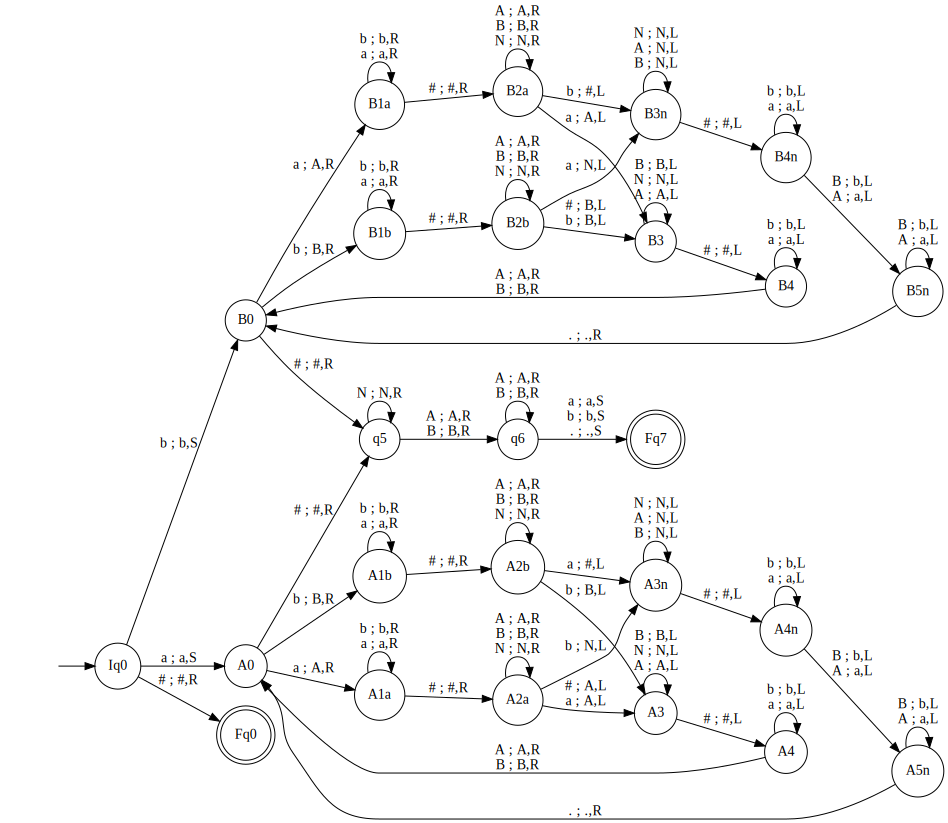

In [116]:
dotObj_tm(Asg9DTM, FuseEdges=True)

# Tests for the DTM

### (a) `aba#aba` – pass 
### (b) `aba#ab` – fail
### (c) `aba#baba` – pass 
### (d) `aba#babba` – fail
### (e) `bba#bbabba` – pass


## Please include five more tests of your own

In [117]:
help(explore_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



In [118]:
explore_tm(Asg9DTM, "aba#aba",50)   # PASS

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 7, 'ABA#ABA........', 17)
 via .. 
 ->('Iq0', 0, 'aba#aba', 50)
 ->('A0', 0, 'aba#aba', 49)
 ->('A1a', 1, 'Aba#aba', 48)
 ->('A1a', 2, 'Aba#aba', 47)
 ->('A1a', 3, 'Aba#aba', 46)
 ->('A2a', 4, 'Aba#aba', 45)
 ->('A3', 3, 'Aba#Aba', 44)
 ->('A4', 2, 'Aba#Aba', 43)
 ->('A4', 1, 'Aba#Aba', 42)
 ->('A4', 0, 'Aba#Aba', 41)
 ->('A0', 1, 'Aba#Aba', 40)
 ->('A1b', 2, 'ABa#Aba', 39)
 ->('A1b', 3, 'ABa#Aba', 38)
 ->('A2b', 4, 'ABa#Aba', 37)
 ->('A2b', 5, 'ABa#Aba', 36)
 ->('A3', 4, 'ABa#ABa', 35)
 ->('A3', 3, 'ABa#ABa', 34)
 ->('A4', 2, 'ABa#ABa', 33)
 ->('A4', 1, 'ABa#ABa', 32)
 ->('A0', 2, 'ABa#ABa', 31)
 ->('A1a', 3, 'ABA#ABa', 30)
 ->('A2a', 4, 'ABA#ABa', 29)
 ->('A2a', 5, 'ABA#ABa', 28)
 ->('A2a', 6, 'ABA#ABa', 27)
 ->('A3', 5, 'ABA#ABA', 26)
 ->('A3', 4, 'ABA#ABA', 25)
 ->('A3', 3, 'ABA#ABA', 24)
 ->('A4', 2, 'ABA#ABA', 23)
 ->('A0', 3, 'ABA#ABA', 22)
 ->('q5', 4, 'ABA#ABA', 21)
 ->('q6', 5, 'ABA

In [119]:
explore_tm(Asg9DTM, "aba#ab",50)    # FAIL

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2a', 6, 'ABA#AB', 27)
 via .. 
 ->('Iq0', 0, 'aba#ab', 50)
 ->('A0', 0, 'aba#ab', 49)
 ->('A1a', 1, 'Aba#ab', 48)
 ->('A1a', 2, 'Aba#ab', 47)
 ->('A1a', 3, 'Aba#ab', 46)
 ->('A2a', 4, 'Aba#ab', 45)
 ->('A3', 3, 'Aba#Ab', 44)
 ->('A4', 2, 'Aba#Ab', 43)
 ->('A4', 1, 'Aba#Ab', 42)
 ->('A4', 0, 'Aba#Ab', 41)
 ->('A0', 1, 'Aba#Ab', 40)
 ->('A1b', 2, 'ABa#Ab', 39)
 ->('A1b', 3, 'ABa#Ab', 38)
 ->('A2b', 4, 'ABa#Ab', 37)
 ->('A2b', 5, 'ABa#Ab', 36)
 ->('A3', 4, 'ABa#AB', 35)
 ->('A3', 3, 'ABa#AB', 34)
 ->('A4', 2, 'ABa#AB', 33)
 ->('A4', 1, 'ABa#AB', 32)
 ->('A0', 2, 'ABa#AB', 31)
 ->('A1a', 3, 'ABA#AB', 30)
 ->('A2a', 4, 'ABA#AB', 29)
 ->('A2a', 5, 'ABA#AB', 28)
 ->('A2a', 6, 'ABA#AB', 27)


In [120]:
explore_tm(Asg9DTM, "aba#baba",51)  # PASS

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 16, '........ABA#NABA........', 1)
 via .. 
 ->('Iq0', 0, 'aba#baba', 51)
 ->('A0', 0, 'aba#baba', 50)
 ->('A1a', 1, 'Aba#baba', 49)
 ->('A1a', 2, 'Aba#baba', 48)
 ->('A1a', 3, 'Aba#baba', 47)
 ->('A2a', 4, 'Aba#baba', 46)
 ->('A3n', 3, 'Aba#Naba', 45)
 ->('A4n', 2, 'Aba#Naba', 44)
 ->('A4n', 1, 'Aba#Naba', 43)
 ->('A4n', 0, 'Aba#Naba', 42)
 ->('A5n', 7, '........aba#Naba', 41)
 ->('A0', 8, '........aba#Naba', 40)
 ->('A1a', 9, '........Aba#Naba', 39)
 ->('A1a', 10, '........Aba#Naba', 38)
 ->('A1a', 11, '........Aba#Naba', 37)
 ->('A2a', 12, '........Aba#Naba', 36)
 ->('A2a', 13, '........Aba#Naba', 35)
 ->('A3', 12, '........Aba#NAba', 34)
 ->('A3', 11, '........Aba#NAba', 33)
 ->('A4', 10, '........Aba#NAba', 32)
 ->('A4', 9, '........Aba#NAba', 31)
 ->('A4', 8, '........Aba#NAba', 30)
 ->('A0', 9, '........Aba#NAba', 29)
 ->('A1b', 10, '........ABa#N

In [121]:
explore_tm(Asg9DTM, "aba#babba",73) # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2b', 17, '........ABa#NNNNA', 1)
 via .. 
 ->('Iq0', 0, 'aba#babba', 73)
 ->('A0', 0, 'aba#babba', 72)
 ->('A1a', 1, 'Aba#babba', 71)
 ->('A1a', 2, 'Aba#babba', 70)
 ->('A1a', 3, 'Aba#babba', 69)
 ->('A2a', 4, 'Aba#babba', 68)
 ->('A3n', 3, 'Aba#Nabba', 67)
 ->('A4n', 2, 'Aba#Nabba', 66)
 ->('A4n', 1, 'Aba#Nabba', 65)
 ->('A4n', 0, 'Aba#Nabba', 64)
 ->('A5n', 7, '........aba#Nabba', 63)
 ->('A0', 8, '........aba#Nabba', 62)
 ->('A1a', 9, '........Aba#Nabba', 61)
 ->('A1a', 10, '........Aba#Nabba', 60)
 ->('A1a', 11, '........Aba#Nabba', 59)
 ->('A2a', 12, '........Aba#Nabba', 58)
 ->('A2a', 13, '........Aba#Nabba', 57)
 ->('A3', 12, '........Aba#NAbba', 56)
 ->('A3', 11, '........Aba#NAbba', 55)
 ->('A4', 10, '........Aba#NAbba', 54)
 ->('A4', 9, '........Aba#NAbba', 53)
 ->('A4', 8, '........Aba#NAbba', 52)
 ->('A0', 9, '........Aba#NAbba', 51)
 ->('A1b', 10

In [122]:
explore_tm(Asg9DTM, "bba#bbabba",50)    # PASS

Detailing the halted configs now.
Accepted at  ('Fq7', 7, 'BBA#BBAbba', 17)
 via .. 
 ->('Iq0', 0, 'bba#bbabba', 50)
 ->('B0', 0, 'bba#bbabba', 49)
 ->('B1b', 1, 'Bba#bbabba', 48)
 ->('B1b', 2, 'Bba#bbabba', 47)
 ->('B1b', 3, 'Bba#bbabba', 46)
 ->('B2b', 4, 'Bba#bbabba', 45)
 ->('B3', 3, 'Bba#Bbabba', 44)
 ->('B4', 2, 'Bba#Bbabba', 43)
 ->('B4', 1, 'Bba#Bbabba', 42)
 ->('B4', 0, 'Bba#Bbabba', 41)
 ->('B0', 1, 'Bba#Bbabba', 40)
 ->('B1b', 2, 'BBa#Bbabba', 39)
 ->('B1b', 3, 'BBa#Bbabba', 38)
 ->('B2b', 4, 'BBa#Bbabba', 37)
 ->('B2b', 5, 'BBa#Bbabba', 36)
 ->('B3', 4, 'BBa#BBabba', 35)
 ->('B3', 3, 'BBa#BBabba', 34)
 ->('B4', 2, 'BBa#BBabba', 33)
 ->('B4', 1, 'BBa#BBabba', 32)
 ->('B0', 2, 'BBa#BBabba', 31)
 ->('B1a', 3, 'BBA#BBabba', 30)
 ->('B2a', 4, 'BBA#BBabba', 29)
 ->('B2a', 5, 'BBA#BBabba', 28)
 ->('B2a', 6, 'BBA#BBabba', 27)
 ->('B3', 5, 'BBA#BBAbba', 26)
 ->('B3', 4, 'BBA#BBAbba', 25)
 ->('B3', 3, 'BBA#BBAbba', 24)
 ->('B4', 2, 'BBA#BBAbba', 23)
 ->('B0', 3, 'BBA#BBAbba', 22)
 ->

### My 5 Tests
- `#abab` – PASS
- `abaaba#bbaabaabaabb` – PASS
- `aaabbbaaa#bbbaaabbbaaa` – PASS
- `aaabbb#ab` – FAIL
- `aaabbb#abbbaaab` – FAIL


In [123]:
explore_tm(Asg9DTM, "#abab",2) # PASS

Detailing the halted configs now.
Accepted at  ('Fq0', 1, '#abab', 1)
 via .. 
 ->('Iq0', 0, '#abab', 2)
 ->('Fq0', 1, '#abab', 1)


In [124]:
explore_tm(Asg9DTM, "abaaba#bbaabaabaabb",213)   # PASS

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fq7', 24, '........ABAABA#NNNABAABAabb', 1)
 via .. 
 ->('Iq0', 0, 'abaaba#bbaabaabaabb', 213)
 ->('A0', 0, 'abaaba#bbaabaabaabb', 212)
 ->('A1a', 1, 'Abaaba#bbaabaabaabb', 211)
 ->('A1a', 2, 'Abaaba#bbaabaabaabb', 210)
 ->('A1a', 3, 'Abaaba#bbaabaabaabb', 209)
 ->('A1a', 4, 'Abaaba#bbaabaabaabb', 208)
 ->('A1a', 5, 'Abaaba#bbaabaabaabb', 207)
 ->('A1a', 6, 'Abaaba#bbaabaabaabb', 206)
 ->('A2a', 7, 'Abaaba#bbaabaabaabb', 205)
 ->('A3n', 6, 'Abaaba#Nbaabaabaabb', 204)
 ->('A4n', 5, 'Abaaba#Nbaabaabaabb', 203)
 ->('A4n', 4, 'Abaaba#Nbaabaabaabb', 202)
 ->('A4n', 3, 'Abaaba#Nbaabaabaabb', 201)
 ->('A4n', 2, 'Abaaba#Nbaabaabaabb', 200)
 ->('A4n', 1, 'Abaaba#Nbaabaabaabb', 199)
 ->('A4n', 0, 'Abaaba#Nbaabaabaabb', 198)
 ->('A5n', 7, '........abaaba#Nbaabaabaabb', 197)
 ->('A0', 8, '........abaaba#Nbaabaabaabb', 196)
 ->('A1a', 9, '........Abaaba#Nbaabaabaabb', 195)
 ->('A1a', 10, '........Abaaba#Nbaabaab

In [125]:
explore_tm(Asg9DTM, "aaabbbaaa#bbbaaabbbaaa",331)    # PASS

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 30, '........AAABBBAAA#NNNAAABBBAAA........', 1)
 via .. 
 ->('Iq0', 0, 'aaabbbaaa#bbbaaabbbaaa', 331)
 ->('A0', 0, 'aaabbbaaa#bbbaaabbbaaa', 330)
 ->('A1a', 1, 'Aaabbbaaa#bbbaaabbbaaa', 329)
 ->('A1a', 2, 'Aaabbbaaa#bbbaaabbbaaa', 328)
 ->('A1a', 3, 'Aaabbbaaa#bbbaaabbbaaa', 327)
 ->('A1a', 4, 'Aaabbbaaa#bbbaaabbbaaa', 326)
 ->('A1a', 5, 'Aaabbbaaa#bbbaaabbbaaa', 325)
 ->('A1a', 6, 'Aaabbbaaa#bbbaaabbbaaa', 324)
 ->('A1a', 7, 'Aaabbbaaa#bbbaaabbbaaa', 323)
 ->('A1a', 8, 'Aaabbbaaa#bbbaaabbbaaa', 322)
 ->('A1a', 9, 'Aaabbbaaa#bbbaaabbbaaa', 321)
 ->('A2a', 10, 'Aaabbbaaa#bbbaaabbbaaa', 320)
 ->('A3n', 9, 'Aaabbbaaa#Nbbaaabbbaaa', 319)
 ->('A4n', 8, 'Aaabbbaaa#Nbbaaabbbaaa', 318)
 ->('A4n', 7, 'Aaabbbaaa#Nbbaaabbbaaa', 317)
 ->('A4n', 6, 'Aaabbbaaa#Nbbaaabbbaaa', 316)
 ->('A4n', 5, 'Aaabbbaaa#Nbbaaabbbaaa', 315)
 ->('A4n', 4, 'Aaabbbaaa#Nbbaaabbbaaa', 314

In [126]:
explore_tm(Asg9DTM, "aaabbb#ab",43) # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2a', 17, '........Aaabbb#NN', 1)
 via .. 
 ->('Iq0', 0, 'aaabbb#ab', 43)
 ->('A0', 0, 'aaabbb#ab', 42)
 ->('A1a', 1, 'Aaabbb#ab', 41)
 ->('A1a', 2, 'Aaabbb#ab', 40)
 ->('A1a', 3, 'Aaabbb#ab', 39)
 ->('A1a', 4, 'Aaabbb#ab', 38)
 ->('A1a', 5, 'Aaabbb#ab', 37)
 ->('A1a', 6, 'Aaabbb#ab', 36)
 ->('A2a', 7, 'Aaabbb#ab', 35)
 ->('A3', 6, 'Aaabbb#Ab', 34)
 ->('A4', 5, 'Aaabbb#Ab', 33)
 ->('A4', 4, 'Aaabbb#Ab', 32)
 ->('A4', 3, 'Aaabbb#Ab', 31)
 ->('A4', 2, 'Aaabbb#Ab', 30)
 ->('A4', 1, 'Aaabbb#Ab', 29)
 ->('A4', 0, 'Aaabbb#Ab', 28)
 ->('A0', 1, 'Aaabbb#Ab', 27)
 ->('A1a', 2, 'AAabbb#Ab', 26)
 ->('A1a', 3, 'AAabbb#Ab', 25)
 ->('A1a', 4, 'AAabbb#Ab', 24)
 ->('A1a', 5, 'AAabbb#Ab', 23)
 ->('A1a', 6, 'AAabbb#Ab', 22)
 ->('A2a', 7, 'AAabbb#Ab', 21)
 ->('A2a', 8, 'AAabbb#Ab', 20)
 ->('A3n', 7, 'AAabbb#AN', 19)
 ->('A3n', 6, 'AAabbb#NN', 18)
 ->('A4n', 5, 'AAabbb#NN', 17)
 

In [127]:
explore_tm(Asg9DTM, "aaabbb#abbbaaab",179)   # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2b', 23, '........AAABBb#NNNNAAAB', 1)
 via .. 
 ->('Iq0', 0, 'aaabbb#abbbaaab', 179)
 ->('A0', 0, 'aaabbb#abbbaaab', 178)
 ->('A1a', 1, 'Aaabbb#abbbaaab', 177)
 ->('A1a', 2, 'Aaabbb#abbbaaab', 176)
 ->('A1a', 3, 'Aaabbb#abbbaaab', 175)
 ->('A1a', 4, 'Aaabbb#abbbaaab', 174)
 ->('A1a', 5, 'Aaabbb#abbbaaab', 173)
 ->('A1a', 6, 'Aaabbb#abbbaaab', 172)
 ->('A2a', 7, 'Aaabbb#abbbaaab', 171)
 ->('A3', 6, 'Aaabbb#Abbbaaab', 170)
 ->('A4', 5, 'Aaabbb#Abbbaaab', 169)
 ->('A4', 4, 'Aaabbb#Abbbaaab', 168)
 ->('A4', 3, 'Aaabbb#Abbbaaab', 167)
 ->('A4', 2, 'Aaabbb#Abbbaaab', 166)
 ->('A4', 1, 'Aaabbb#Abbbaaab', 165)
 ->('A4', 0, 'Aaabbb#Abbbaaab', 164)
 ->('A0', 1, 'Aaabbb#Abbbaaab', 163)
 ->('A1a', 2, 'AAabbb#Abbbaaab', 162)
 ->('A1a', 3, 'AAabbb#Abbbaaab', 161)
 ->('A1a', 4, 'AAabbb#Abbbaaab', 160)
 ->('A1a', 5, 'AAabbb#Abbbaaab', 159)
 ->('A1a', 6, 'AAabbb#Abbbaaab', 1

# Asg9 NDTM for w#x where w is a substring of x

In [128]:
# w#x NDTM
 

Asg9NDTM = md2mc('''TM

!! NDTM means that there must be at least one state with multiple outputs.
!!  Σ: {a, b, #, ε}
!!  Γ: {a, b, #, A, B, N, ., ε}
!!  Q: {Iq0, Fq0, q1a, q1b, q2a, q2b,  
!!       q3, q4, q5, q6a, q6b, q7a, q7b,
!!       q8, q9, Fq10}
!! q₀: Iq0
!!  F: {Fq0, Fq12}
!!  δ: **see bellow**
  
!!---- Identify & accept ε substring ----
Iq0 : # ;   # , R   -> Fq0



!!---- ND find start of w in x ----------   !! After figring out if w starts with 'a'/'b'
Iq0     : a ;   A , R   -> q1a              !!  move past '#', then non-deterministacally
Iq0     : b ;   B , R   -> q1b              !!  look for w in x by guessing start point.



!!--- ND find start of w (a) in x ---       
!!-- Move from w to x (a) --
q1a     : a ;   a , R   -> q1a
q1a     : b ;   b , R   -> q1a
q1a     : # ;   # , R   -> q2a

!!-- **>>ND Step (a)<<** ---                !! w starts with 'a' → non-deter find w's start
q2a     : b ;   N , R   -> q2a              !!  - Deterministically mark 'b's as 'N'
q2a     : a ;   A , L   -> q3               !!  - Non-Determ either mark 'a's as 'N'
q2a     : a ;   N , R   -> q2a              !!     OR decide to check if it is start of w


!!--- ND find start of w (b) in x ---       
!!-- Move from w to x (b) --
q1b     : a ;   a , R   -> q1b
q1b     : b ;   b , R   -> q1b
q1b     : # ;   # , R   -> q2b

!!-- **>>ND Step (b)<<** ---                !! w starts with 'b' → non-deter find w's start
q2b     : a ;   N , R   -> q2b              !!  - Deterministically mark 'a's as 'N'
q2b     : b ;   B , L   -> q3               !!  - Non-Determ either mark 'b's as 'N'
q2b     : b ;   N , R   -> q2b              !!     OR decide to check if it is start of w



!!---- Check ND choice & w ∈ x ----------   !! 
!!-- Move from x to w ------
q3      : A ;   A , L   -> q3
q3      : B ;   B , L   -> q3
q3      : N ;   N , L   -> q3
q3      : # ;   # , L   -> q4

q4      : a ;   a , L   -> q4
q4      : b ;   b , L   -> q4
q4      : A ;   A , R   -> q5
q4      : B ;   B , R   -> q5


!!--- Next char in w is 'a' ---------       !!
q5      : a ;   A , R   -> q6a

!!-- Move from w to x (a) --
q6a     : a ;   a , R   -> q6a
q6a     : b ;   b , R   -> q6a
q6a     : # ;   # , R   -> q7a

q7a     : A ;   A , R   -> q7a
q7a     : B ;   B , R   -> q7a
q7a     : N ;   N , R   -> q7a

!!-- Is x next char 'a'? ---
q7a     : a ;   A , L   -> q3


!!--- Next char in w is 'b' ---------       !!
q5      : b ;   B , R   -> q6b

!!-- Move from w to x (b) --
q6b     : a ;   a , R   -> q6b
q6b     : b ;   b , R   -> q6b
q6b     : # ;   # , R   -> q7b

q7b     : A ;   A , R   -> q7b
q7b     : B ;   B , R   -> q7b
q7b     : N ;   N , R   -> q7b

!!-- Is x next char 'b'? ---
q7b     : b ;   B , L   -> q3



!!---- Finished Processing --------------   !!
q5      : # ;   # , S   -> Fq5

''')



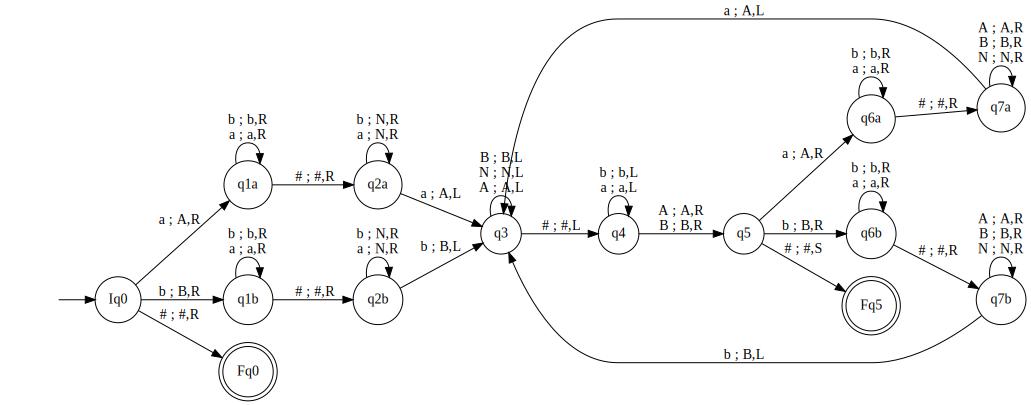

In [129]:
dotObj_tm(Asg9NDTM, FuseEdges=True)

In [130]:
explore_tm(Asg9NDTM, "aba#aba",50)      # PASS

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 7, 'Aba#NNN', 43)
 via .. 
 ->('Iq0', 0, 'aba#aba', 50)
 ->('q1a', 1, 'Aba#aba', 49)
 ->('q1a', 2, 'Aba#aba', 48)
 ->('q1a', 3, 'Aba#aba', 47)
 ->('q2a', 4, 'Aba#aba', 46)
 ->('q2a', 5, 'Aba#Nba', 45)
 ->('q2a', 6, 'Aba#NNa', 44)
 ->('q2a', 7, 'Aba#NNN', 43)
Rejected at  ('q7b', 7, 'ABa#NNA', 31)
 via .. 
 ->('Iq0', 0, 'aba#aba', 50)
 ->('q1a', 1, 'Aba#aba', 49)
 ->('q1a', 2, 'Aba#aba', 48)
 ->('q1a', 3, 'Aba#aba', 47)
 ->('q2a', 4, 'Aba#aba', 46)
 ->('q2a', 5, 'Aba#Nba', 45)
 ->('q2a', 6, 'Aba#NNa', 44)
 ->('q3', 5, 'Aba#NNA', 43)
 ->('q3', 4, 'Aba#NNA', 42)
 ->('q3', 3, 'Aba#NNA', 41)
 ->('q4', 2, 'Aba#NNA', 40)
 ->('q4', 1, 'Aba#NNA', 39)
 ->('q4', 0, 'Aba#NNA', 38)
 ->('q5', 1, 'Aba#NNA', 37)
 ->('q6b', 2, 'ABa#NNA', 36)
 ->('q6b', 3, 'ABa#NNA', 35)
 ->('q7b', 4, 'ABa#NNA', 34)
 ->('q7b', 5, 'ABa#NNA', 33)
 ->('q7b', 6, 'ABa#NNA', 32)
 ->('q7b', 7, 

In [131]:
explore_tm(Asg9NDTM, "aba#ab",50)       # FAIL

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 6, 'Aba#NN', 44)
 via .. 
 ->('Iq0', 0, 'aba#ab', 50)
 ->('q1a', 1, 'Aba#ab', 49)
 ->('q1a', 2, 'Aba#ab', 48)
 ->('q1a', 3, 'Aba#ab', 47)
 ->('q2a', 4, 'Aba#ab', 46)
 ->('q2a', 5, 'Aba#Nb', 45)
 ->('q2a', 6, 'Aba#NN', 44)
Rejected at  ('q7a', 6, 'ABA#AB', 28)
 via .. 
 ->('Iq0', 0, 'aba#ab', 50)
 ->('q1a', 1, 'Aba#ab', 49)
 ->('q1a', 2, 'Aba#ab', 48)
 ->('q1a', 3, 'Aba#ab', 47)
 ->('q2a', 4, 'Aba#ab', 46)
 ->('q3', 3, 'Aba#Ab', 45)
 ->('q4', 2, 'Aba#Ab', 44)
 ->('q4', 1, 'Aba#Ab', 43)
 ->('q4', 0, 'Aba#Ab', 42)
 ->('q5', 1, 'Aba#Ab', 41)
 ->('q6b', 2, 'ABa#Ab', 40)
 ->('q6b', 3, 'ABa#Ab', 39)
 ->('q7b', 4, 'ABa#Ab', 38)
 ->('q7b', 5, 'ABa#Ab', 37)
 ->('q3', 4, 'ABa#AB', 36)
 ->('q3', 3, 'ABa#AB', 35)
 ->('q4', 2, 'ABa#AB', 34)
 ->('q4', 1, 'ABa#AB', 33)
 ->('q5', 2, 'ABa#AB', 32)
 ->('q6a', 3, 'ABA#AB', 31)
 ->('q7a', 4, 'ABA#AB', 30)
 ->('q7a', 5, 'ABA

In [132]:
explore_tm(Asg9NDTM, "aba#baba",50)     # PASS

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 8, 'Aba#NNNN', 42)
 via .. 
 ->('Iq0', 0, 'aba#baba', 50)
 ->('q1a', 1, 'Aba#baba', 49)
 ->('q1a', 2, 'Aba#baba', 48)
 ->('q1a', 3, 'Aba#baba', 47)
 ->('q2a', 4, 'Aba#baba', 46)
 ->('q2a', 5, 'Aba#Naba', 45)
 ->('q2a', 6, 'Aba#NNba', 44)
 ->('q2a', 7, 'Aba#NNNa', 43)
 ->('q2a', 8, 'Aba#NNNN', 42)
Rejected at  ('q7b', 8, 'ABa#NNNA', 28)
 via .. 
 ->('Iq0', 0, 'aba#baba', 50)
 ->('q1a', 1, 'Aba#baba', 49)
 ->('q1a', 2, 'Aba#baba', 48)
 ->('q1a', 3, 'Aba#baba', 47)
 ->('q2a', 4, 'Aba#baba', 46)
 ->('q2a', 5, 'Aba#Naba', 45)
 ->('q2a', 6, 'Aba#NNba', 44)
 ->('q2a', 7, 'Aba#NNNa', 43)
 ->('q3', 6, 'Aba#NNNA', 42)
 ->('q3', 5, 'Aba#NNNA', 41)
 ->('q3', 4, 'Aba#NNNA', 40)
 ->('q3', 3, 'Aba#NNNA', 39)
 ->('q4', 2, 'Aba#NNNA', 38)
 ->('q4', 1, 'Aba#NNNA', 37)
 ->('q4', 0, 'Aba#NNNA', 36)
 ->('q5', 1, 'Aba#NNNA', 35)
 ->('q6b', 2, 'ABa#NNNA', 34)
 ->('q6b', 3, 'A

In [133]:
explore_tm(Asg9NDTM, "aba#babba",50)    # FAIL

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 9, 'Aba#NNNNN', 41)
 via .. 
 ->('Iq0', 0, 'aba#babba', 50)
 ->('q1a', 1, 'Aba#babba', 49)
 ->('q1a', 2, 'Aba#babba', 48)
 ->('q1a', 3, 'Aba#babba', 47)
 ->('q2a', 4, 'Aba#babba', 46)
 ->('q2a', 5, 'Aba#Nabba', 45)
 ->('q2a', 6, 'Aba#NNbba', 44)
 ->('q2a', 7, 'Aba#NNNba', 43)
 ->('q2a', 8, 'Aba#NNNNa', 42)
 ->('q2a', 9, 'Aba#NNNNN', 41)
Rejected at  ('q7b', 9, 'ABa#NNNNA', 25)
 via .. 
 ->('Iq0', 0, 'aba#babba', 50)
 ->('q1a', 1, 'Aba#babba', 49)
 ->('q1a', 2, 'Aba#babba', 48)
 ->('q1a', 3, 'Aba#babba', 47)
 ->('q2a', 4, 'Aba#babba', 46)
 ->('q2a', 5, 'Aba#Nabba', 45)
 ->('q2a', 6, 'Aba#NNbba', 44)
 ->('q2a', 7, 'Aba#NNNba', 43)
 ->('q2a', 8, 'Aba#NNNNa', 42)
 ->('q3', 7, 'Aba#NNNNA', 41)
 ->('q3', 6, 'Aba#NNNNA', 40)
 ->('q3', 5, 'Aba#NNNNA', 39)
 ->('q3', 4, 'Aba#NNNNA', 38)
 ->('q3', 3, 'Aba#NNNNA', 37)
 ->('q4', 2, 'Aba#NNNNA', 36)
 ->('q4', 1, 'Aba

In [134]:
explore_tm(Asg9NDTM, "bba#bbabba",50)   # PASS

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq5', 3, 'BBA#BBAbba', 22)
 via .. 
 ->('Iq0', 0, 'bba#bbabba', 50)
 ->('q1b', 1, 'Bba#bbabba', 49)
 ->('q1b', 2, 'Bba#bbabba', 48)
 ->('q1b', 3, 'Bba#bbabba', 47)
 ->('q2b', 4, 'Bba#bbabba', 46)
 ->('q3', 3, 'Bba#Bbabba', 45)
 ->('q4', 2, 'Bba#Bbabba', 44)
 ->('q4', 1, 'Bba#Bbabba', 43)
 ->('q4', 0, 'Bba#Bbabba', 42)
 ->('q5', 1, 'Bba#Bbabba', 41)
 ->('q6b', 2, 'BBa#Bbabba', 40)
 ->('q6b', 3, 'BBa#Bbabba', 39)
 ->('q7b', 4, 'BBa#Bbabba', 38)
 ->('q7b', 5, 'BBa#Bbabba', 37)
 ->('q3', 4, 'BBa#BBabba', 36)
 ->('q3', 3, 'BBa#BBabba', 35)
 ->('q4', 2, 'BBa#BBabba', 34)
 ->('q4', 1, 'BBa#BBabba', 33)
 ->('q5', 2, 'BBa#BBabba', 32)
 ->('q6a', 3, 'BBA#BBabba', 31)
 ->('q7a', 4, 'BBA#BBabba', 30)
 ->('q7a', 5, 'BBA#BBabba', 29)
 ->('q7a', 6, 'BBA#BBabba', 28)
 ->('q3', 5, 'BBA#BBAbba', 27)
 ->('q3', 4, 'BBA#BBAbba', 26)
 ->('q3', 3, 'BBA#BBAbba', 25)
 ->('q4', 2, 'BBA#BBAbba', 24)
 ->('q5', 3, 'BBA#BBAbba'

### My 5 Tests
- `#abab` – PASS
- `abaaba#bbaabaabaabb` – PASS
- `aaabbbaaa#bbbaaabbbaaa` – PASS
- `aaabbb#ab` – FAIL
- `aaabbb#abbbaaab` – FAIL


In [135]:
explore_tm(Asg9NDTM, "#abab",2) # PASS

Detailing the halted configs now.
Accepted at  ('Fq0', 1, '#abab', 1)
 via .. 
 ->('Iq0', 0, '#abab', 2)
 ->('Fq0', 1, '#abab', 1)


In [136]:
explore_tm(Asg9NDTM, "abaaba#bbaabaabaabb",500)   # PASS

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 19, 'Abaaba#NNNNNNNNNNNN', 481)
 via .. 
 ->('Iq0', 0, 'abaaba#bbaabaabaabb', 500)
 ->('q1a', 1, 'Abaaba#bbaabaabaabb', 499)
 ->('q1a', 2, 'Abaaba#bbaabaabaabb', 498)
 ->('q1a', 3, 'Abaaba#bbaabaabaabb', 497)
 ->('q1a', 4, 'Abaaba#bbaabaabaabb', 496)
 ->('q1a', 5, 'Abaaba#bbaabaabaabb', 495)
 ->('q1a', 6, 'Abaaba#bbaabaabaabb', 494)
 ->('q2a', 7, 'Abaaba#bbaabaabaabb', 493)
 ->('q2a', 8, 'Abaaba#Nbaabaabaabb', 492)
 ->('q2a', 9, 'Abaaba#NNaabaabaabb', 491)
 ->('q2a', 10, 'Abaaba#NNNabaabaabb', 490)
 ->('q2a', 11, 'Abaaba#NNNNbaabaabb', 489)
 ->('q2a', 12, 'Abaaba#NNNNNaabaabb', 488)
 ->('q2a', 13, 'Abaaba#NNNNNNabaabb', 487)
 ->('q2a', 14, 'Abaaba#NNNNNNNbaabb', 486)
 ->('q2a', 15, 'Abaaba#NNNNNNNNaabb', 485)
 ->('q2a', 16, 'Abaaba#NNNNNNNNNabb', 484)
 ->('q2a', 17, 'Abaaba#NNNNNNNNNNbb', 483)
 ->('q2a', 18, 'Abaaba#NNNNNNNNNNNb', 482)
 ->('q2a', 19, 'Abaaba#NNNNNNNNNNNN', 481)
Rejected at  (

In [137]:
explore_tm(Asg9NDTM, "aaabbbaaa#bbbaaabbbaaa",500)    # PASS

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 22, 'Aaabbbaaa#NNNNNNNNNNNN', 478)
 via .. 
 ->('Iq0', 0, 'aaabbbaaa#bbbaaabbbaaa', 500)
 ->('q1a', 1, 'Aaabbbaaa#bbbaaabbbaaa', 499)
 ->('q1a', 2, 'Aaabbbaaa#bbbaaabbbaaa', 498)
 ->('q1a', 3, 'Aaabbbaaa#bbbaaabbbaaa', 497)
 ->('q1a', 4, 'Aaabbbaaa#bbbaaabbbaaa', 496)
 ->('q1a', 5, 'Aaabbbaaa#bbbaaabbbaaa', 495)
 ->('q1a', 6, 'Aaabbbaaa#bbbaaabbbaaa', 494)
 ->('q1a', 7, 'Aaabbbaaa#bbbaaabbbaaa', 493)
 ->('q1a', 8, 'Aaabbbaaa#bbbaaabbbaaa', 492)
 ->('q1a', 9, 'Aaabbbaaa#bbbaaabbbaaa', 491)
 ->('q2a', 10, 'Aaabbbaaa#bbbaaabbbaaa', 490)
 ->('q2a', 11, 'Aaabbbaaa#Nbbaaabbbaaa', 489)
 ->('q2a', 12, 'Aaabbbaaa#NNbaaabbbaaa', 488)
 ->('q2a', 13, 'Aaabbbaaa#NNNaaabbbaaa', 487)
 ->('q2a', 14, 'Aaabbbaaa#NNNNaabbbaaa', 486)
 ->('q2a', 15, 'Aaabbbaaa#NNNNNabbbaaa', 485)
 ->('q2a', 16, 

In [138]:
explore_tm(Asg9NDTM, "aaabbb#ab",50) # FAIL

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('q2a', 9, 'Aaabbb#NN', 41)
 via .. 
 ->('Iq0', 0, 'aaabbb#ab', 50)
 ->('q1a', 1, 'Aaabbb#ab', 49)
 ->('q1a', 2, 'Aaabbb#ab', 48)
 ->('q1a', 3, 'Aaabbb#ab', 47)
 ->('q1a', 4, 'Aaabbb#ab', 46)
 ->('q1a', 5, 'Aaabbb#ab', 45)
 ->('q1a', 6, 'Aaabbb#ab', 44)
 ->('q2a', 7, 'Aaabbb#ab', 43)
 ->('q2a', 8, 'Aaabbb#Nb', 42)
 ->('q2a', 9, 'Aaabbb#NN', 41)
Rejected at  ('q7a', 8, 'AAabbb#Ab', 28)
 via .. 
 ->('Iq0', 0, 'aaabbb#ab', 50)
 ->('q1a', 1, 'Aaabbb#ab', 49)
 ->('q1a', 2, 'Aaabbb#ab', 48)
 ->('q1a', 3, 'Aaabbb#ab', 47)
 ->('q1a', 4, 'Aaabbb#ab', 46)
 ->('q1a', 5, 'Aaabbb#ab', 45)
 ->('q1a', 6, 'Aaabbb#ab', 44)
 ->('q2a', 7, 'Aaabbb#ab', 43)
 ->('q3', 6, 'Aaabbb#Ab', 42)
 ->('q4', 5, 'Aaabbb#Ab', 41)
 ->('q4', 4, 'Aaabbb#Ab', 40)
 ->('q4', 3, 'Aaabbb#Ab', 39)
 ->('q4', 2, 'Aaabbb#Ab', 38)
 ->('q4', 1, 'Aaabbb#Ab', 37)
 ->('q4', 0, 'Aaabbb#Ab', 36)
 ->('q5', 1, 'Aaabbb#Ab', 35)
 ->('q6a', 2, 'AAabbb#Ab', 3

In [139]:
explore_tm(Asg9NDTM, "aaabbb#abbbaaab",50)   # FAIL

Allocating  8  tape cells to the RIGHT!
There are still  2 truncated paths.
Detailing the halted configs now.
Rejected at  ('q2a', 15, 'Aaabbb#NNNNNNNN', 35)
 via .. 
 ->('Iq0', 0, 'aaabbb#abbbaaab', 50)
 ->('q1a', 1, 'Aaabbb#abbbaaab', 49)
 ->('q1a', 2, 'Aaabbb#abbbaaab', 48)
 ->('q1a', 3, 'Aaabbb#abbbaaab', 47)
 ->('q1a', 4, 'Aaabbb#abbbaaab', 46)
 ->('q1a', 5, 'Aaabbb#abbbaaab', 45)
 ->('q1a', 6, 'Aaabbb#abbbaaab', 44)
 ->('q2a', 7, 'Aaabbb#abbbaaab', 43)
 ->('q2a', 8, 'Aaabbb#Nbbbaaab', 42)
 ->('q2a', 9, 'Aaabbb#NNbbaaab', 41)
 ->('q2a', 10, 'Aaabbb#NNNbaaab', 40)
 ->('q2a', 11, 'Aaabbb#NNNNaaab', 39)
 ->('q2a', 12, 'Aaabbb#NNNNNaab', 38)
 ->('q2a', 13, 'Aaabbb#NNNNNNab', 37)
 ->('q2a', 14, 'Aaabbb#NNNNNNNb', 36)
 ->('q2a', 15, 'Aaabbb#NNNNNNNN', 35)
Rejected at  ('q7a', 14, 'AAabbb#NNNNNNAb', 10)
 via .. 
 ->('Iq0', 0, 'aaabbb#abbbaaab', 50)
 ->('q1a', 1, 'Aaabbb#abbbaaab', 49)
 ->('q1a', 2, 'Aaabbb#abbbaaab', 48)
 ->('q1a', 3, 'Aaabbb#abbbaaab', 47)
 ->('q1a', 4, 'Aaabbb#abbbaaab

# END